## Importing Libraries

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.subplots as sp
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
!pip install plotly


   ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.3 MB 1.6 MB/s eta 0:00:10
   - -------------------------------------- 0.8/16.3 MB 1.7 MB/s eta 0:00:10
   --- ------------------------------------ 1.3/16.3 MB 2.0 MB/s eta 0:00:08
   ---- ----------------------------------- 1.8/16.3 MB 2.0 MB/s eta 0:00:08
   ------ --------------------------------- 2.6/16.3 MB 2.3 MB/s eta 0:00:06
   -------- ------------------------------- 3.4/16.3 MB 2.6 MB/s eta 0:00:05
   ----------- ---------------------------- 4.7/16.3 MB 3.1 MB/s eta 0:00:04
   -------------- ------------------------- 6.0/16.3 MB 3.5 MB/s eta 0:00:03
   ------------------ --------------------- 7.3/16.3 MB 3.7 MB/s eta 0:00:03
   --------------------- ------------------ 8.7/16.3 MB 4.0 MB/s eta 0:00:02
   ----------------------- ---------------- 9.4/16.3 MB 4.0 MB/s eta 0:00:02
   ----------


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Loading Dataset

In [4]:
df = pd.read_csv(r"C:\Users\Rhythm\OneDrive\Desktop\Manya\Customer Churn Prediction/Churn_Modelling.csv")

df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df['CustomerId'].value_counts()

CustomerId
15656710    1
15768163    1
15672754    1
15719276    1
15692664    1
           ..
15737888    1
15701354    1
15619304    1
15647311    1
15634602    1
Name: count, Length: 10000, dtype: int64

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [8]:
df.shape

(10000, 14)

## Data Cleaning

In [9]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

## Data Stats & Distribution

In [11]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# Assuming df is your DataFrame with the specified columns
# Get descriptive statistics for all columns
all_column_stats = df.describe()

# Exclude the 'count', 'min', 'max' value from the statistics for all columns
all_column_stats = all_column_stats.drop(['count', 'min', 'max'])

# Calculate the number of rows and columns dynamically
num_columns = len(all_column_stats.columns)
num_rows = (num_columns - 1) // 3 + 1

# Create a grid of bar plots using Plotly
fig = make_subplots(rows=num_rows, cols=3, subplot_titles=all_column_stats.columns)

# Iterate over each column
for i, column in enumerate(all_column_stats.columns):
    row_num = i // 3 + 1
    col_num = i % 3 + 1
    
    # Select column statistics
    column_stats = all_column_stats[column]
    
    # Add bar trace to the subplot
    fig.add_trace(
        go.Bar(
            x=column_stats.index,
            y=column_stats.values,
            marker_color=px.colors.qualitative.Set3,
            texttemplate='%{y:.2s}',
            textposition='outside',
        ),
        row=row_num,
        col=col_num,
    )
    
    # Update subplot layout
    fig.update_xaxes(title_text=column, row=row_num, col=col_num)
    fig.update_yaxes(title_text='Values', row=row_num, col=col_num)

# Update layout for the entire figure
fig.update_layout(showlegend=False, height=300 * num_rows, width=900, title_text="Descriptive Statistics")
fig.show()


In [14]:
# Create box plot for all columns
columns = list(df.columns)[1:9]

fig = make_subplots(rows=3, cols=3, subplot_titles=[f'{column}' for column in columns])

for i, column in enumerate(columns):
    row, col = divmod(i, 3)  # Calculate the row and column index

    box_plot = go.Box(y=df[column], name=f'{column} Median')
    
    
    # Add traces to subplots
    fig.add_trace(box_plot, row=row + 1, col=col + 1)

fig.update_layout(height=700, width=950, title_text="Descriptive Statistics")
fig.update_xaxes(tickangle=45)  # Rotate x-axis labels

fig.show()

In [15]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

columns = list(df.columns)[:9]

# Add spaces to subplot titles for better layout
subplot_titles = [f'{column}' for column in columns]

fig = make_subplots(rows=3, cols=3, subplot_titles=subplot_titles, vertical_spacing=0.15, horizontal_spacing=0.15)

for i, column in enumerate(columns):
    row, col = divmod(i, 3)  # Calculate the row and column index
    histogram = go.Histogram(x=df[column], name=column)
    fig.add_trace(histogram, row=row + 1, col=col + 1)

fig.update_layout(height=1600, width=950, title_text="Data Distribution")
fig.update_xaxes(tickangle=45)  # Rotate x-axis labels

fig.show()

## Data Visualisation

In [16]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


C:\Users\Rhythm\AppData\Local\Temp\ipykernel_26172\3601689594.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




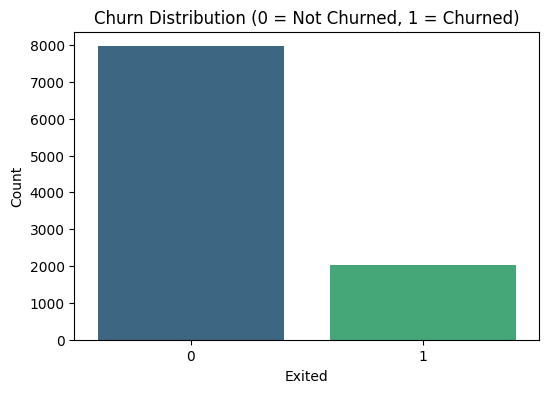

In [17]:
# Plot Churn Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Exited', data=df, palette='viridis')
plt.title('Churn Distribution (0 = Not Churned, 1 = Churned)')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

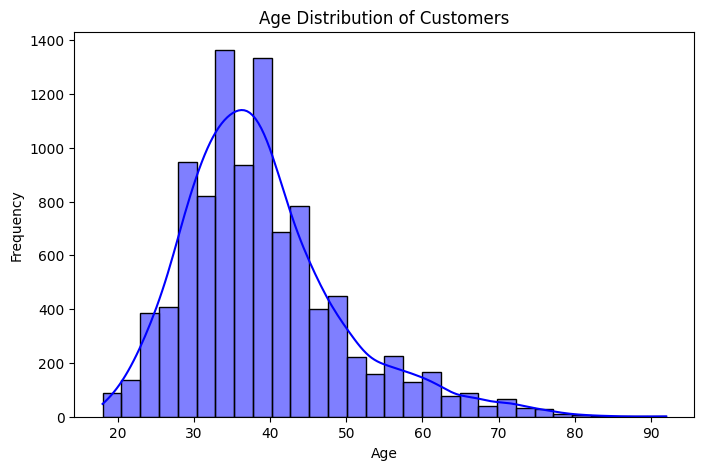

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

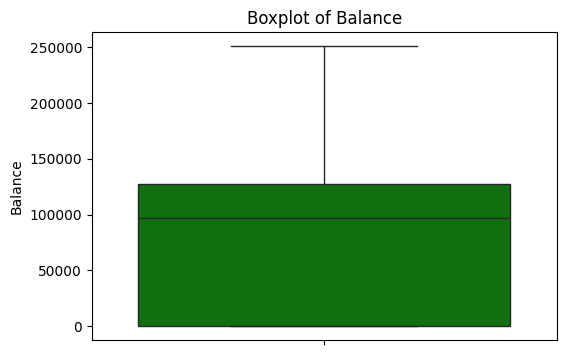

In [19]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['Balance'], color='green')
plt.title('Boxplot of Balance')
plt.ylabel('Balance')
plt.show()

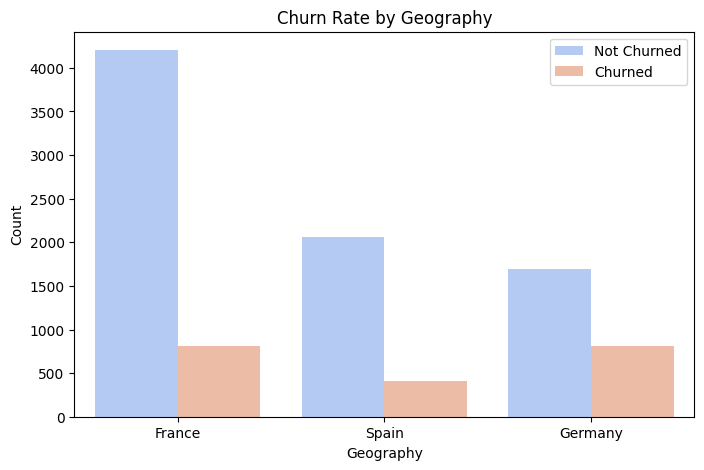

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(x='Geography', hue='Exited', data=df, palette='coolwarm')
plt.title('Churn Rate by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.legend(['Not Churned', 'Churned'])
plt.show()

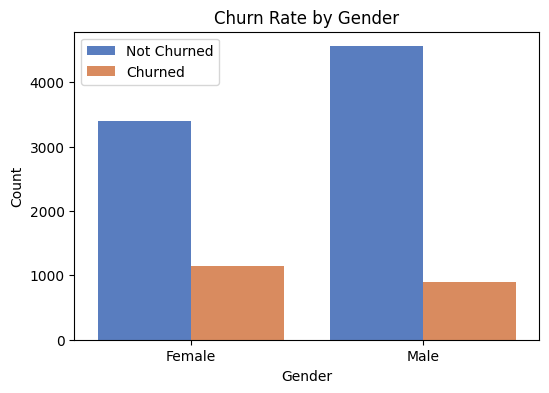

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Exited', data=df, palette='muted')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(['Not Churned', 'Churned'])
plt.show()

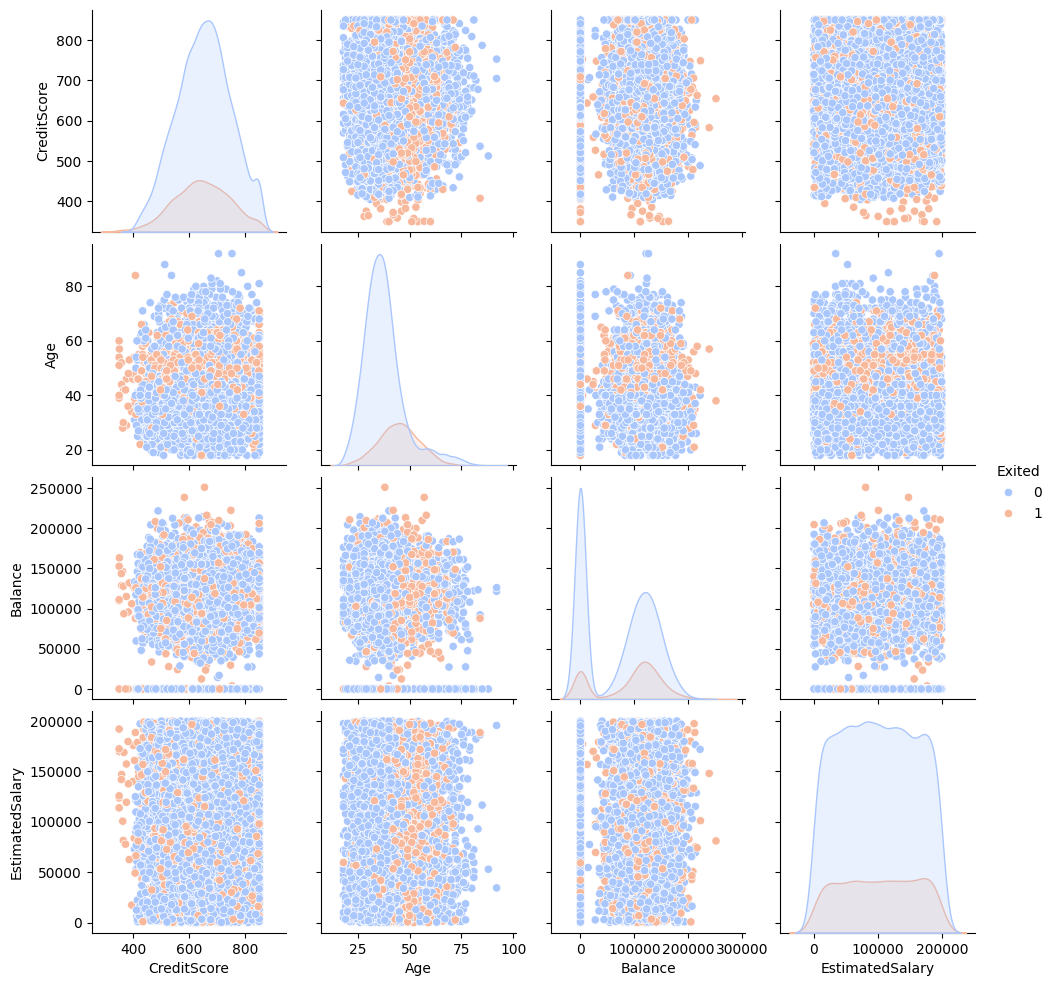

In [22]:
sns.pairplot(df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']], hue='Exited', palette='coolwarm')
plt.show()

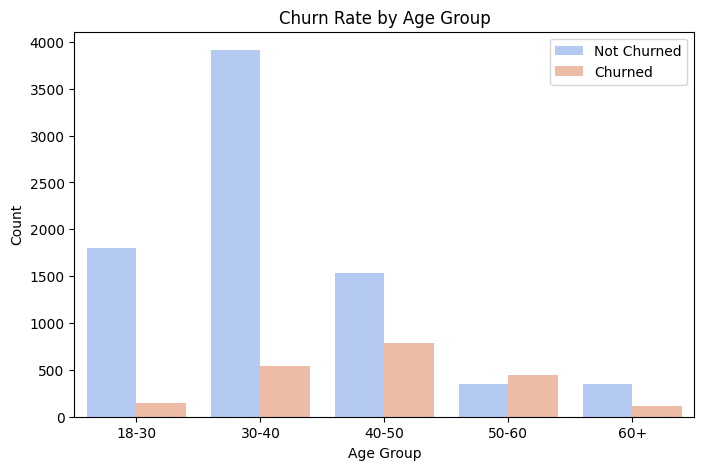

In [23]:
df['Age_Group'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '30-40', '40-50', '50-60', '60+'])

plt.figure(figsize=(8,5))
sns.countplot(x='Age_Group', hue='Exited', data=df, palette='coolwarm')
plt.title('Churn Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(['Not Churned', 'Churned'])
plt.show()

In [24]:
df


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,40-50
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,40-50
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,40-50
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,30-40
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,40-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,30-40
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,30-40
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,30-40
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,40-50


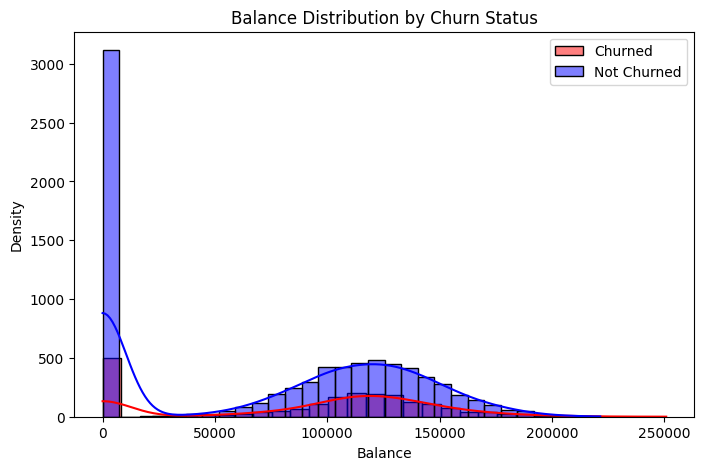

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['Exited']==1]['Balance'], bins=30, kde=True, color='red', label='Churned')
sns.histplot(df[df['Exited']==0]['Balance'], bins=30, kde=True, color='blue', label='Not Churned')
plt.title('Balance Distribution by Churn Status')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.legend()
plt.show()

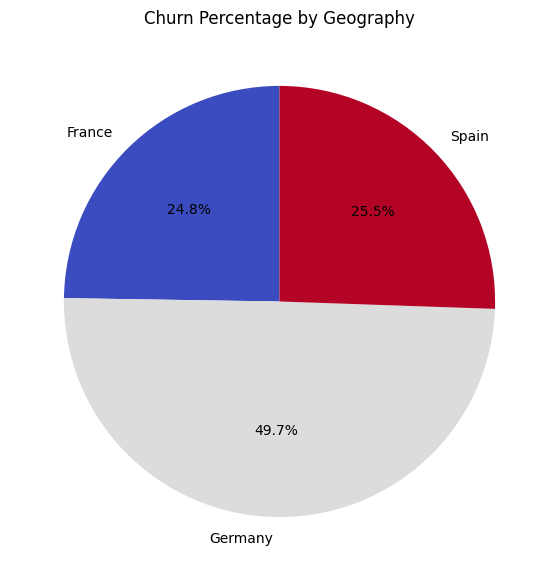

In [26]:
plt.figure(figsize=(7,7))
df_geo = df.groupby('Geography')['Exited'].mean() * 100
df_geo.plot.pie(autopct="%1.1f%%", cmap='coolwarm', startangle=90)
plt.title("Churn Percentage by Geography")
plt.ylabel("")  # Remove y-label
plt.show()

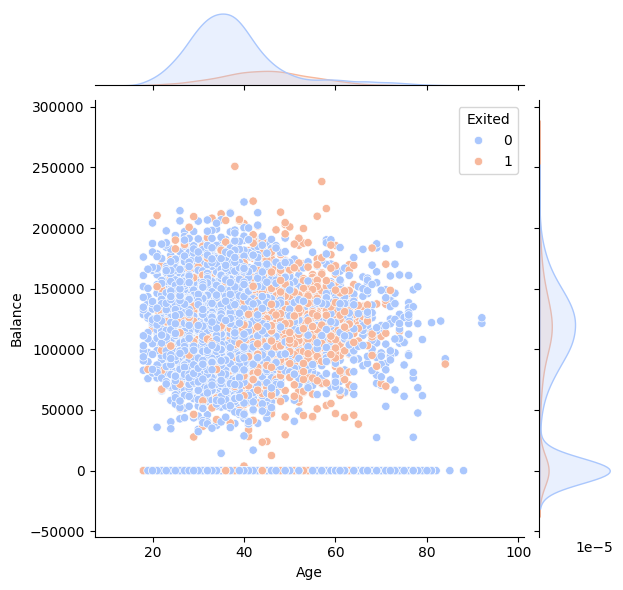

In [27]:
sns.jointplot(data=df, x='Age', y='Balance', hue='Exited', kind='scatter', palette='coolwarm')
plt.show()

In [30]:
# Example list of low-correlation pairs (Replace with actual pairs from correlation analysis)
low_correlation_pairs_list = [("CreditScore", "Age"), ("Balance", "EstimatedSalary"), ("Tenure", "NumOfProducts")]

# Create subplot grid
fig = sp.make_subplots(rows=1, cols=3)

# Iterate over each subplot and scatter column pair
for i, (col1, col2) in enumerate(low_correlation_pairs_list):
    row_num, col_num = divmod(i, 3)  # row_num = 0 always since rows=1
    scatter = go.Scatter(x=df[col1], y=df[col2], mode='markers', name=f'Trace {i+1}')
    fig.add_trace(scatter, row=row_num+1, col=col_num+1)

    # Update x and y axis titles for each subplot dynamically
    fig.update_xaxes(title_text=col1, row=row_num+1, col=col_num+1)
    fig.update_yaxes(title_text=col2, row=row_num+1, col=col_num+1)

# Layout settings
fig.update_layout(title_text="Low Correlation between Variables", showlegend=False, width=1300)
fig.show()

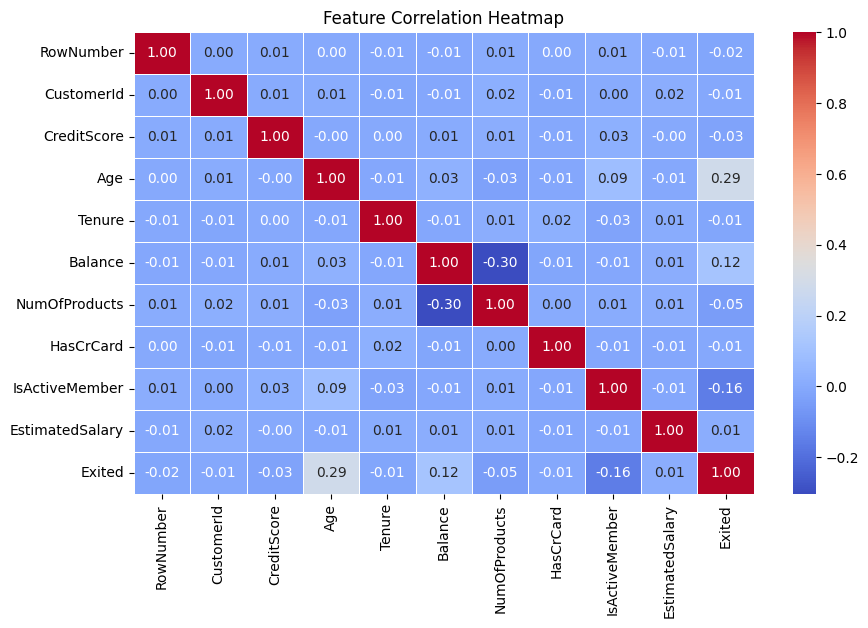

In [31]:
# Compute correlation matrix (only for numerical features)
corr_matrix = df.select_dtypes(include=["number"]).corr()

# Plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [32]:
# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=['Count Plot of Tenure', 'Pie Chart of Tenure'], 
                    specs=[[{'type': 'bar'}, {'type': 'pie'}]])

# Count Plot (Tenure Distribution)
tenure_counts = df['Tenure'].value_counts().sort_index()
count_plot_trace = go.Bar(x=tenure_counts.index, 
                          y=tenure_counts.values, 
                          marker=dict(color='lightblue'))
fig.add_trace(count_plot_trace, row=1, col=1)

# Pie Chart (Tenure Distribution)
pie_chart_trace = go.Pie(labels=tenure_counts.index, 
                         values=tenure_counts.values, 
                         marker=dict(colors=['green', 'orange', 'red', 'blue', 'purple']),
                         textinfo='percent+label')
fig.add_trace(pie_chart_trace, row=1, col=2)

# Layout customization
fig.update_layout(title_text="Count Plot and Pie Chart for Customer Tenure", showlegend=False)

# Show plot
fig.show()


## Data Transformation

In [33]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,40-50
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,40-50
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,40-50
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,30-40
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,40-50


In [34]:
# Select numerical columns correctly
numerical_columns = df.select_dtypes(include=['number']).columns

# Print numerical columns
print("Numerical Columns:")
for column in numerical_columns:
    print(column)

Numerical Columns:
RowNumber
CustomerId
CreditScore
Age
Tenure
Balance
NumOfProducts
HasCrCard
IsActiveMember
EstimatedSalary
Exited


In [35]:
# Clean column names
df.columns = df.columns.str.strip()

# Select numeric columns for standardization
numerical_columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Standardize the data
scaler = StandardScaler()
df_scaled_array = scaler.fit_transform(df[numerical_columns])
df_scaled = pd.DataFrame(df_scaled_array, columns=numerical_columns)

# Display results
print("Original Data:\n", df[numerical_columns].head())
print("\nStandardized Data:\n", df_scaled.head())

Original Data:
    CreditScore  Age    Balance  EstimatedSalary
0          619   42       0.00        101348.88
1          608   41   83807.86        112542.58
2          502   42  159660.80        113931.57
3          699   39       0.00         93826.63
4          850   43  125510.82         79084.10

Standardized Data:
    CreditScore       Age   Balance  EstimatedSalary
0    -0.326221  0.293517 -1.225848         0.021886
1    -0.440036  0.198164  0.117350         0.216534
2    -1.536794  0.293517  1.333053         0.240687
3     0.501521  0.007457 -1.225848        -0.108918
4     2.063884  0.388871  0.785728        -0.365276


In [36]:
# Clean column names (strip spaces, if any)
df.columns = df.columns.str.strip()

# Select numerical columns for normalization
numerical_columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
df_normalized_array = scaler.fit_transform(df[numerical_columns])
df_normalized = pd.DataFrame(df_normalized_array, columns=numerical_columns)

# Display results
print("Original Data:\n", df[numerical_columns].head())
print("\nNormalized Data:\n", df_normalized.head()) 

Original Data:
    CreditScore  Age    Balance  EstimatedSalary
0          619   42       0.00        101348.88
1          608   41   83807.86        112542.58
2          502   42  159660.80        113931.57
3          699   39       0.00         93826.63
4          850   43  125510.82         79084.10

Normalized Data:
    CreditScore       Age   Balance  EstimatedSalary
0        0.538  0.324324  0.000000         0.506735
1        0.516  0.310811  0.334031         0.562709
2        0.304  0.324324  0.636357         0.569654
3        0.698  0.283784  0.000000         0.469120
4        1.000  0.337838  0.500246         0.395400


In [37]:
scaler = MinMaxScaler()
df_normalized_array = scaler.fit_transform(df[numerical_columns])
df_normalized = pd.DataFrame(df_normalized_array, columns = numerical_columns)
df_normalized

,CreditScore,Age,Balance,EstimatedSalary
0,0.538,0.324324,0.000000,0.506735
1,0.516,0.310811,0.334031,0.562709
2,0.304,0.324324,0.636357,0.569654
3,0.698,0.283784,0.000000,0.469120
4,1.000,0.337838,0.500246,0.395400
...,...,...,...,...
9995,0.842,0.283784,0.000000,0.481341
9996,0.332,0.229730,0.228657,0.508490
9997,0.718,0.243243,0.000000,0.210390
9998,0.844,0.324324,0.299226,0.464429


## ML Model Training

In [38]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,40-50
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,40-50
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,40-50
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,30-40
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,40-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,30-40
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,30-40
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,30-40
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,40-50


In [39]:
from sklearn.preprocessing import LabelEncoder

categorical_clos = [ 'Geography', 'Gender','Age_Group']

le_dict = {}

for col in categorical_clos:  # Corrected variable name
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le  # Store the LabelEncoder for potential inverse transformations

df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1,2
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0,2
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1,2
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0,1
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,1,39,5,0.00,2,1,0,96270.64,0,1
9996,9997,15569892,Johnstone,516,0,1,35,10,57369.61,1,1,1,101699.77,0,1
9997,9998,15584532,Liu,709,0,0,36,7,0.00,1,0,1,42085.58,1,1
9998,9999,15682355,Sabbatini,772,1,1,42,3,75075.31,2,1,0,92888.52,1,2


In [40]:
df = df.drop(['RowNumber',	'CustomerId',	'Surname'],axis = 1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,2
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,2
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,2
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,1
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0,1
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0,1
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1,2


In [41]:
df.dropna(inplace = True)

In [42]:
X = df.drop('Exited',axis = 1)
y = df['Exited']


# train-test-split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)
print("X Train shape = {}, X Test shape = {},y train shape = {},y Test shape = {} ".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X Train shape = (8000, 11), X Test shape = (2000, 11),y train shape = (8000,),y Test shape = (2000,) 


In [43]:
print(X_train.dtypes)

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Age_Group            int64
dtype: object


In [44]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Age_Group
9254,686,0,1,32,6,0.00,2,1,1,179093.26,1
1561,632,1,1,42,4,119624.60,2,1,1,195978.86,2
1670,559,2,1,24,3,114739.92,1,1,0,85891.02,0
6087,561,0,0,27,9,135637.00,1,1,0,153080.40,0
6669,517,0,1,56,9,142147.32,1,0,0,39488.04,3
...,...,...,...,...,...,...,...,...,...,...,...
5734,768,0,1,54,8,69712.74,1,1,1,69381.05,3
5191,682,0,0,58,1,0.00,1,1,1,706.50,3
5390,735,0,0,38,1,0.00,3,0,0,92220.12,1
860,667,0,1,43,8,190227.46,1,1,0,97508.04,2


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

print('LogisticRegression Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

LogisticRegression Accuracy: 0.7985
              precision    recall  f1-score   support

           0       0.81      0.97      0.89      1607
           1       0.43      0.08      0.13       393

    accuracy                           0.80      2000
   macro avg       0.62      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000



c:\Users\Rhythm\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [46]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.858
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.77      0.40      0.52       393

    accuracy                           0.86      2000
   macro avg       0.82      0.68      0.72      2000
weighted avg       0.85      0.86      0.84      2000



In [47]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=500, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.869
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.78      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.86      0.87      0.86      2000



In [48]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = accuracy_score(y_test, y_pred)

# Print model performance
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")

c:\Users\Rhythm\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Logistic Regression: 0.7985
Decision Tree: 0.7830
Random Forest: 0.8665


## Further Analysis after the training

In [49]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,2
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,2
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,2
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,1
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0,1
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0,1
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1,2


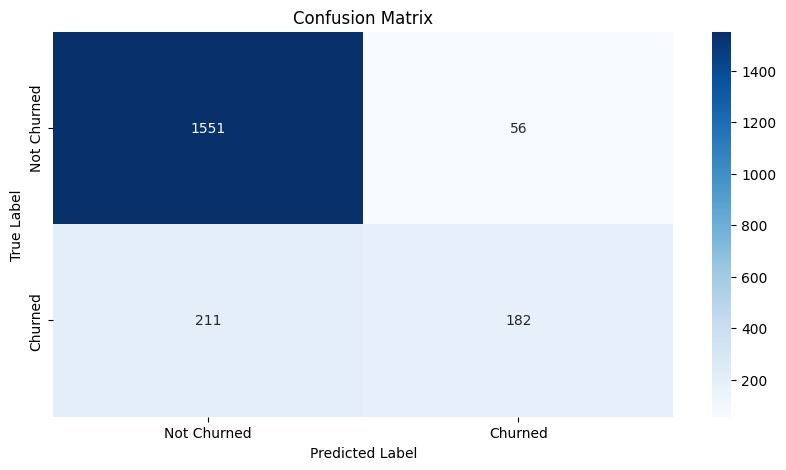

In [50]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using heatmap
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Not Churned", "Churned"], 
            yticklabels=["Not Churned", "Churned"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

c:\Users\Rhythm\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



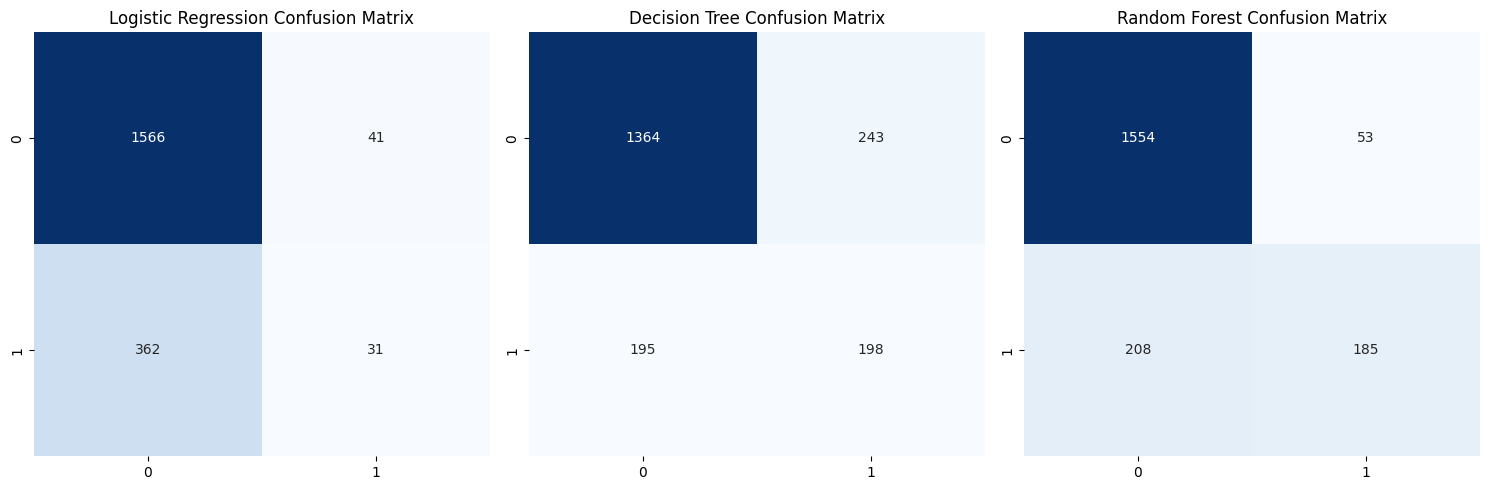

In [52]:
import math
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Store results
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    results[name] = {"Test Confusion Matrix": cm}

# Determine subplot grid size
num_models = len(results)
num_cols = min(num_models, 3)  # Max 3 columns per row
num_rows = math.ceil(num_models / num_cols)

# Plot Confusion Matrices
plt.figure(figsize=(15, 5))
for i, (name, metrics) in enumerate(results.items()):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.heatmap(metrics['Test Confusion Matrix'], annot=True, cmap="Blues", fmt="d", cbar=False)
    plt.title(f'{name} Confusion Matrix')

plt.tight_layout()
plt.show()